In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv", low_memory=False)
test_df = pd.read_csv("test.csv", low_memory=False)

In [3]:
test_df["Survived"] = 1
test_df["isTrain"] = False
train_df["isTrain"] = True

df = pd.concat([train_df, test_df], axis=0)

In [4]:
df.drop(["Cabin"], inplace=True)

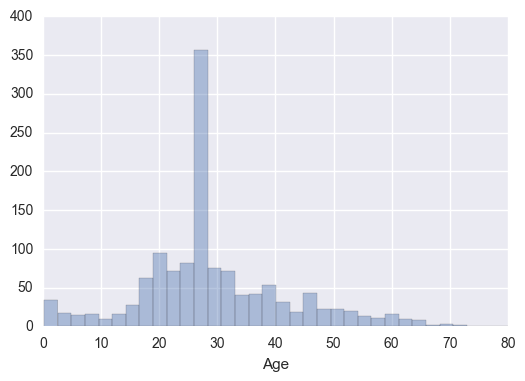

In [5]:
sns.set(color_codes=True)
df["Age"] = df["Age"].fillna(df.Age.median())
sns.distplot(df.Age, kde=False)

In [6]:
from scipy.stats import skew, kurtosis
skew(df.Age)

0.5403669601817418

In [7]:
kurtosis(df.Age)

0.9616259997506416

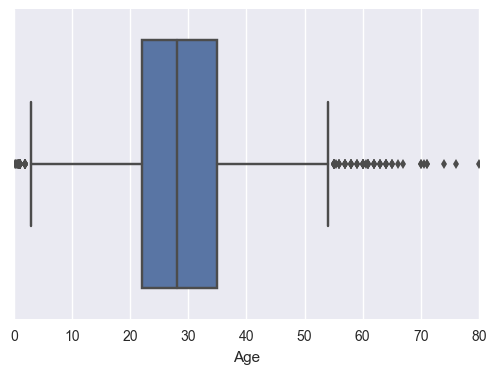

In [8]:
sns.boxplot(df.Age)

In [9]:
df["Age"] = (df["Age"] - df.Age.mean()) / df.Age.std()

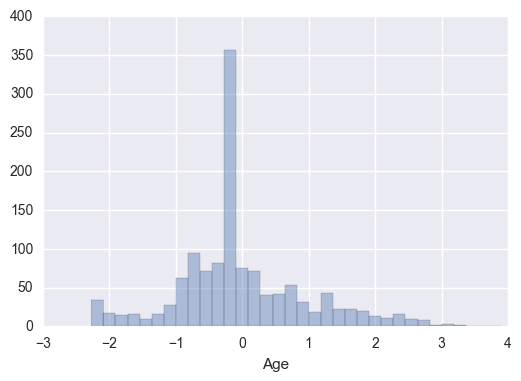

In [10]:
sns.distplot(df.Age, kde=False)

In [11]:
df.Age.describe()

count    1.309000e+03
mean     3.835740e-17
std      1.000000e+00
min     -2.272967e+00
25%     -5.814061e-01
50%     -1.164787e-01
75%      4.259366e-01
max      3.912892e+00
Name: Age, dtype: float64

In [12]:
x1 = df[df["Survived"] == 0].Age
x2 = df[df["Survived"] == 1].Age

In [13]:
print(len(x1), len(x2))

549 760


In [14]:
from statsmodels.stats.weightstats import ztest

In [15]:
ztest(x1, x2)

(1.2513408426388308, 0.21081015035942274)

C:\Users\Personal\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


ValueError: cannot convert float NaN to integer

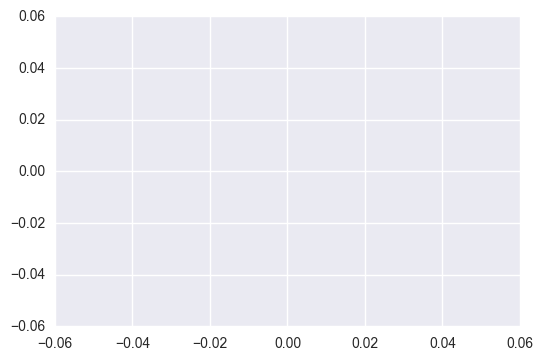

In [17]:
sns.distplot(np.log(df.Age), kde=False)

In [ ]:
pca = PCA(n_components=2)
cols = df.columns
features = cols.delete(-3)
target = "Survived"
transformed = pca.fit_transform(df.loc[:, features].values)

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.Embarked = train_df.Embarked.fillna(value='S')
train_df.Age = train_df.Age.fillna(train_df.Age.median())

In [ ]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
train_df.head()

In [ ]:
df = pd.get_dummies(train_df)

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 5)
target = "Survived"
features = set(df.columns)  - set([target])
selector = rfe.fit(df.loc[:, features], df.loc[:, target])

In [ ]:
f = np.array(f)
imp_features = selector.ranking_ <= 2
imp_features = f[imp_features]

In [ ]:
df.loc[1, ["Survived", "Pclass"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, imp_features], df.loc[:, target], test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(df, columns=["Pclass"])

In [ ]:
f

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
kfold = StratifiedKFold(n_splits=3)
cross_val_score(model, x_train, y_train, cv=kfold, n_jobs=-1)

In [ ]:
C_s = np.logspace(-3, 2, 10)

In [ ]:
clf = GridSearchCV(model, param_grid=dict(C=C_s), n_jobs=-1)
clf.fit(x_train, y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_.C